# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [5]:
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo= pd.read_table(url, sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

                     quantity
item_name                    
Chicken Bowl              761
Chicken Burrito           591
Chips and Guacamole       506
Steak Burrito             386
Canned Soft Drink         351


Text(0.5, 1.0, "Most ordered Chipotle's Items")

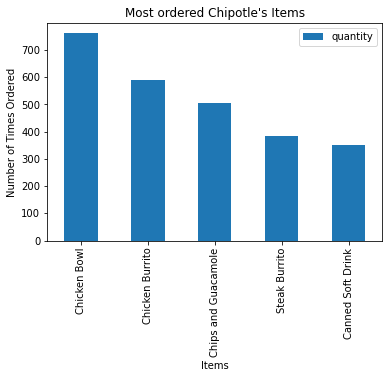

In [138]:

x=chipo.copy()
x=chipo.groupby(['item_name']).agg({'quantity':sum}).sort_values(['quantity'],ascending=False)
x=x.head(5)
print(x)
x.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

#stuck on this for hours; practice groupby, sum and sort

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

Text(0.5, 1.0, 'Number of Items Ordered per total Price')

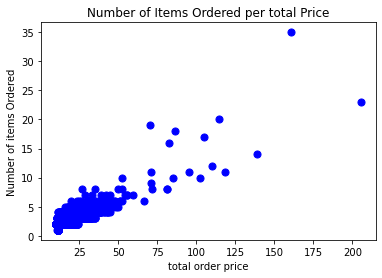

In [31]:
#the question should ask create a scatterplot with the number of items orderered per total order price
chipo['item_price'] = pd.to_numeric(chipo['item_price'], errors='coerce') #convert item price from dollar to number
#you need the above because the sum in group by only aggregates numerical values, the above turns it into a numerical value

newChipo=chipo.copy()
newChipo=chipo.groupby(['order_id']).agg({'quantity':sum, 'item_price':sum})
#group the order IDs together, and for each distinct order_id get a sum of all the numerical attributes in the data frame .
#for instance, add the quantity of everything with order_ID 1 together, and add the prices of everything with order_ID 1 together

plt.scatter(newChipo.item_price, newChipo.quantity, s = 50, c = 'blue')

#Set the title and labels
plt.xlabel('total order price')
plt.ylabel('Number of items Ordered')
plt.title('Number of Items Ordered per total Price')





### Step 7. BONUS: Create a question and a graph to answer your own question.